# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [28]:
data = pd.read_csv(
    "./data/data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [29]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [31]:
data.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [32]:
# Удаляем пропуски в данных
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [33]:
# Проверяем данные на наличие дубликатов
data.duplicated().sum()

5225

In [34]:
# Удаляем дубликаты в данных
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [35]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [36]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [37]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400301 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         400301 non-null  object        
 1   StockCode         400301 non-null  object        
 2   Description       400301 non-null  object        
 3   Quantity          400301 non-null  int64         
 4   InvoiceDate       400301 non-null  datetime64[ns]
 5   UnitPrice         400301 non-null  float64       
 6   CustomerID        400301 non-null  object        
 7   Country           400301 non-null  object        
 8   QuantityCanceled  400301 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.5+ MB


In [38]:
data = data[data['Quantity'] >= 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         392732 non-null  object        
 1   StockCode         392732 non-null  object        
 2   Description       392732 non-null  object        
 3   Quantity          392732 non-null  int64         
 4   InvoiceDate       392732 non-null  datetime64[ns]
 5   UnitPrice         392732 non-null  float64       
 6   CustomerID        392732 non-null  object        
 7   Country           392732 non-null  object        
 8   QuantityCanceled  392732 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.0+ MB


#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [39]:
import re

In [40]:
pattern = '^[a-zA-Z]+'
filter = data['StockCode'].str.contains(pattern)
data = data[~filter]

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391183 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         391183 non-null  object        
 1   StockCode         391183 non-null  object        
 2   Description       391183 non-null  object        
 3   Quantity          391183 non-null  int64         
 4   InvoiceDate       391183 non-null  datetime64[ns]
 5   UnitPrice         391183 non-null  float64       
 6   CustomerID        391183 non-null  object        
 7   Country           391183 non-null  object        
 8   QuantityCanceled  391183 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 29.8+ MB


#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [42]:
data = data.drop(data[data['UnitPrice'] == 0].index)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391150 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         391150 non-null  object        
 1   StockCode         391150 non-null  object        
 2   Description       391150 non-null  object        
 3   Quantity          391150 non-null  int64         
 4   InvoiceDate       391150 non-null  datetime64[ns]
 5   UnitPrice         391150 non-null  float64       
 6   CustomerID        391150 non-null  object        
 7   Country           391150 non-null  object        
 8   QuantityCanceled  391150 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 29.8+ MB


#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [43]:
# Создаем новый столбец с общей ценой товара
data['TotalPrice'] = data['UnitPrice'] * (data['Quantity'] - data['QuantityCanceled'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391150 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         391150 non-null  object        
 1   StockCode         391150 non-null  object        
 2   Description       391150 non-null  object        
 3   Quantity          391150 non-null  int64         
 4   InvoiceDate       391150 non-null  datetime64[ns]
 5   UnitPrice         391150 non-null  float64       
 6   CustomerID        391150 non-null  object        
 7   Country           391150 non-null  object        
 8   QuantityCanceled  391150 non-null  float64       
 9   TotalPrice        391150 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 32.8+ MB


Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



In [44]:
# Создаем новые столбецы с часом и датой совершения транзакции
data['InvoiceDate_date'] = data['InvoiceDate'].dt.date
data['InvoiceDate_day'] = data['InvoiceDate'].dt.day
data['InvoiceDate_season'] = data['InvoiceDate'].dt.quarter
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391150 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           391150 non-null  object        
 1   StockCode           391150 non-null  object        
 2   Description         391150 non-null  object        
 3   Quantity            391150 non-null  int64         
 4   InvoiceDate         391150 non-null  datetime64[ns]
 5   UnitPrice           391150 non-null  float64       
 6   CustomerID          391150 non-null  object        
 7   Country             391150 non-null  object        
 8   QuantityCanceled    391150 non-null  float64       
 9   TotalPrice          391150 non-null  float64       
 10  InvoiceDate_date    391150 non-null  object        
 11  InvoiceDate_day     391150 non-null  int64         
 12  InvoiceDate_season  391150 non-null  int64         
dtypes: datetime64[ns](1), float64

In [45]:
# Рассчитываем выручку по странам
country_sum = data.groupby(['Country']).agg(c_sum=pd.NamedAgg(column='TotalPrice', aggfunc="sum"))
country_sum.sort_values(by='c_sum', ascending=False)

,c_sum
Country,
United Kingdom,6797691.44
Netherlands,283443.54
EIRE,247074.57
Germany,201520.71
France,181529.63
Australia,136950.25
Switzerland,51863.75
Spain,51764.90
Belgium,36673.04


In [46]:
# Рассчитываем выручку по сезонам и странам
country_season_sum = data.groupby(['InvoiceDate_season','Country']).agg(c_sum=pd.NamedAgg(column='TotalPrice', aggfunc="sum"))
country_season_sum.sort_values(by='c_sum', ascending=False)

,,c_sum
InvoiceDate_season,Country,
4,United Kingdom,2522705.12
3,United Kingdom,1733193.71
2,United Kingdom,1402330.52
1,United Kingdom,1139462.09
3,EIRE,91428.38
...,...,...
4,Czech Republic,237.48
3,Cyprus,196.35
1,Canada,140.54


In [47]:
# Находим среднее количество ежедневно поступающих заказов в каждый из часов
group_day_hour = data.groupby(['InvoiceDate_date', 'InvoiceDate_hour']).size()
group_day_hour

KeyError: 'InvoiceDate_hour'

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.

Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391150 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           391150 non-null  object        
 1   StockCode           391150 non-null  object        
 2   Description         391150 non-null  object        
 3   Quantity            391150 non-null  int64         
 4   InvoiceDate         391150 non-null  datetime64[ns]
 5   UnitPrice           391150 non-null  float64       
 6   CustomerID          391150 non-null  object        
 7   Country             391150 non-null  object        
 8   QuantityCanceled    391150 non-null  float64       
 9   TotalPrice          391150 non-null  float64       
 10  InvoiceDate_date    391150 non-null  object        
 11  InvoiceDate_day     391150 non-null  int64         
 12  InvoiceDate_season  391150 non-null  int64         
dtypes: datetime64[ns](1), float64

In [51]:
import numpy as np

t0 = np.datetime64('2011-12-10 00:00:00')
Recency = t0 - data['InvoiceDate'].max()
Recency

Timedelta('0 days 11:10:00')

In [52]:
recency = data.groupby(['CustomerID']).agg(Date=pd.NamedAgg(column='InvoiceDate', aggfunc='max'))
recency = t0 - recency['Date']
recency = recency.apply(lambda x: x.days)
recency

CustomerID
12346    325
12347      2
12348     75
12349     18
12350    310
        ... 
18280    277
18281    180
18282      7
18283      3
18287     42
Name: Date, Length: 4334, dtype: int64

In [53]:
# Рассчитываем общее количество уникальных заказов, которые совершил i-ый клиент
frequency = data.groupby(['CustomerID'])['InvoiceNo'].nunique()
frequency

CustomerID
12346     1
12347     7
12348     4
12349     1
12350     1
         ..
18280     1
18281     1
18282     2
18283    16
18287     3
Name: InvoiceNo, Length: 4334, dtype: int64

In [54]:
# Рассчитываем общее сумму заказов, которые совершил i-ый клиент
monetary = data.groupby(['CustomerID']).agg(Total_Quantity=pd.NamedAgg(column='TotalPrice', aggfunc='sum'))
monetary

,Total_Quantity
CustomerID,
12346,0.00
12347,4310.00
12348,1437.24
12349,1457.55
12350,294.40
...,...
18280,180.60
18281,80.82
18282,176.60


In [55]:
rfm_table = recency.to_frame(name='Date').merge(frequency.to_frame(name='Frequency'), on='CustomerID')
rfm_table = rfm_table.merge(monetary, on='CustomerID')
rfm_table

,Date,Frequency,Total_Quantity
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,2,176.60


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [56]:
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [57]:
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4334 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4334 non-null   int64  
 1   Frequency       4334 non-null   int64  
 2   Total_Quantity  4334 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.4+ KB


In [58]:
# Удаляем выбросы из данных
Q1 = rfm_table['Frequency'].quantile(0.95)
Q2 = rfm_table['Total_Quantity'].quantile(0.95)
rfm_table = rfm_table[(rfm_table['Frequency'] < Q1)]
rfm_table = rfm_table[(rfm_table['Total_Quantity'] < Q2)]

In [59]:
# Итоговый датафрэйм для дальнейшей кластеризации
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4025 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4025 non-null   int64  
 1   Frequency       4025 non-null   int64  
 2   Total_Quantity  4025 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 125.8+ KB


## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
# Стандартизируем данные
scaler = StandardScaler()
rfm_table_norm = scaler.fit_transform(rfm_table)
rfm_table_norm

array([[ 2.24350384, -0.80110972, -0.96014785],
       [-0.94737319,  1.64785227,  3.34723524],
       [-0.22621522,  0.42337127,  0.4762195 ],
       ...,
       [ 0.81106679, -0.80110972, -0.87937692],
       [-0.89797881, -0.39294939, -0.78365508],
       [-0.55221814,  0.01521094,  0.8760166 ]])

In [62]:
from sklearn.decomposition import PCA

In [63]:
# Уменьшаем размерность
pca = PCA(n_components=2)
pca.fit(rfm_table_norm)
print(pca.explained_variance_ratio_)

[0.67357266 0.24002555]


In [64]:
pca

PCA(n_components=2)

In [65]:
# Создаем новый датасет с меньшей размерностью
data_pca = pca.transform(rfm_table_norm)

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

In [69]:
# Определяем коэффициент силуэта для разного количества кластеров методом KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_scores = []
for i in range(3, 11):
  clusterer = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
  cluster_labels = clusterer.fit_predict(data_pca)
  silhouette_avg = silhouette_score(data_pca, cluster_labels)
  silhouette_scores.append(silhouette_avg)

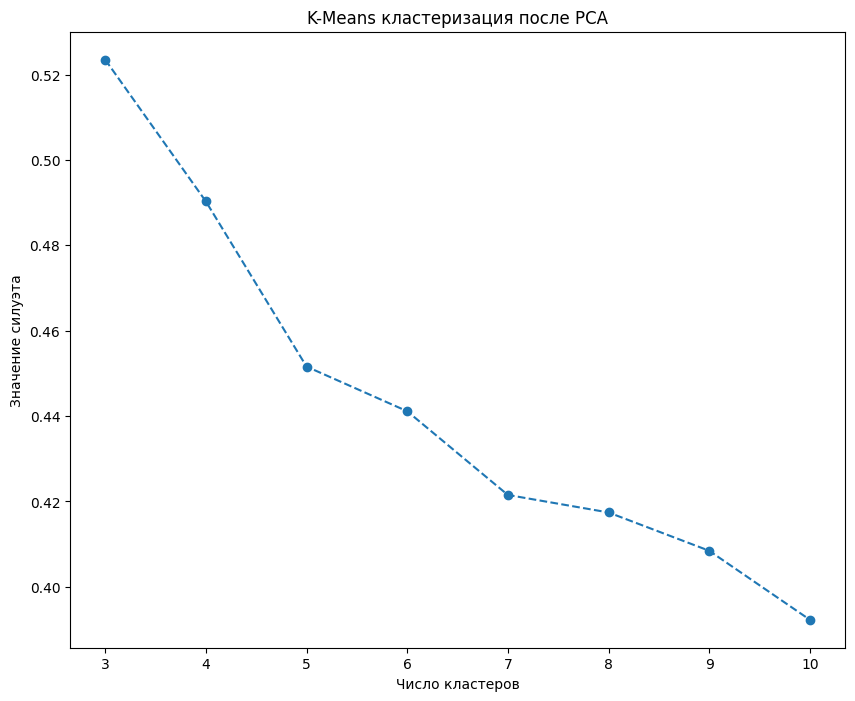

In [70]:
# Визализируем полученный результат для коэффициента силуэта для разного количества кластеров полученных методом KMeans
plt.figure(figsize = (10, 8))
plt.plot(range(3, 11), silhouette_scores, marker = 'o', linestyle= '--')
plt.xlabel('Число кластеров')
plt.ylabel('Значение силуэта')
plt.title('K-Means кластеризация после PCA')
plt.show()

In [94]:
# Определяем коэффициент силуэта для разного количества кластеров методом EM
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_scores = []
for i in range(3, 11):
  clusterer = GaussianMixture(n_components = i, random_state=42)
  cluster_labels = clusterer.fit_predict(data_pca)
  silhouette_avg = silhouette_score(data_pca, cluster_labels)
  silhouette_scores.append(silhouette_avg)

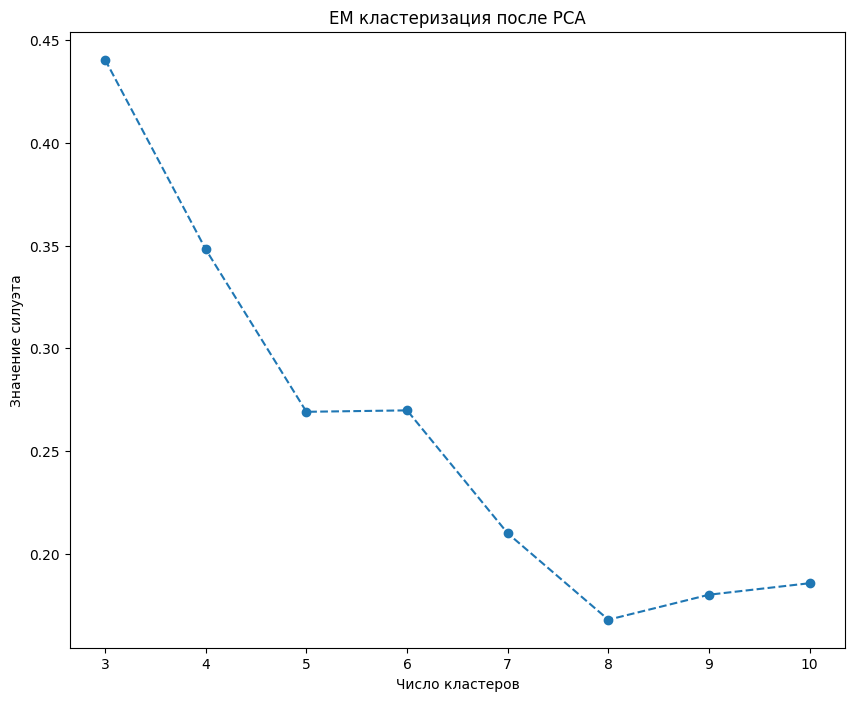

In [96]:
# Визализируем полученный результат для коэффициента силуэта для разного количества кластеров полученных методом EM-algoritm
plt.figure(figsize = (10, 8))
plt.plot(range(3, 11), silhouette_scores, marker = 'o', linestyle= '--')
plt.xlabel('Число кластеров')
plt.ylabel('Значение силуэта')
plt.title('EM кластеризация после PCA')
plt.show()

In [104]:
# Определяем коэффициент силуэта для разного количества кластеров методом AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_scores = []
for i in range(3, 11):
  clusterer = AgglomerativeClustering(n_clusters=i)
  cluster_labels = clusterer.fit_predict(data_pca)
  silhouette_avg = silhouette_score(data_pca, cluster_labels)
  silhouette_scores.append(silhouette_avg)

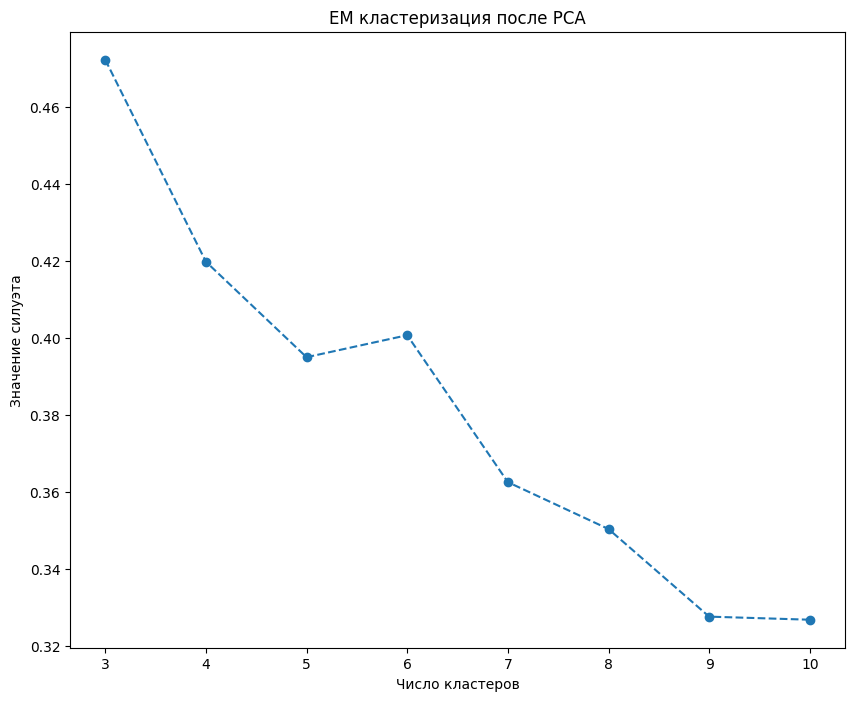

In [105]:
# Визализируем полученный результат для коэффициента силуэта для разного количества кластеров полученных методом AgglomerativeClustering
plt.figure(figsize = (10, 8))
plt.plot(range(3, 11), silhouette_scores, marker = 'o', linestyle= '--')
plt.xlabel('Число кластеров')
plt.ylabel('Значение силуэта')
plt.title('EM кластеризация после PCA')
plt.show()

In [74]:
best_clusterer = KMeans(n_clusters = 3, init = 'k-means++', random_state=42)
cluster_labels = best_clusterer.fit_predict(data_pca)

In [76]:
best_clusterer

KMeans(n_clusters=3, random_state=42)

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

Text(0.5, 0, 'Monetary')

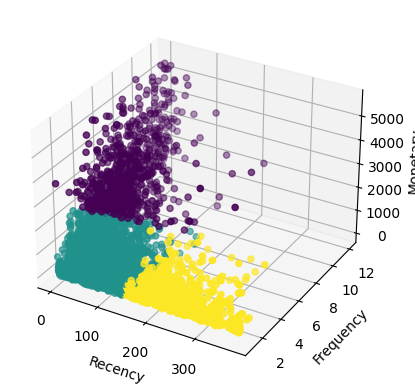

In [72]:
# Визализируем кластеры
recency = rfm_table['Date']
frequency = rfm_table['Frequency']
monetary = rfm_table['Total_Quantity']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(recency, frequency, monetary, c=cluster_labels, cmap='viridis')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

In [78]:
rfm_table['Cluster'] = cluster_labels
rfm_table.groupby('Cluster').mean()

,Date,Frequency,Total_Quantity
Cluster,,,
0,33.091811,6.786600,2556.581663
1,51.459253,2.275552,639.607006
2,253.587174,1.403808,386.544108


Выводы:
Мы получили 3 кластера. 
1 кластер: давно покупали (более 100 дней), редко и на маленькие суммы. 
2 кластер: покупали не очень давно (менее 100 дней), также не часто, на маленькие или средние суммы.
3 кластер: покупали не очень давно (менее 100 дней), часто и на большие суммы. 

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [84]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [85]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [86]:
plot_cluster_profile(rfm_table, 3)

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

Выводы по проекту:
В результате проделанной работы мы проализировали имеющиеся данные. Провели их очистку и предобработку. 
Затем сформировали новый датафрейм по методологии RFM с которым в дальнейшем велась работа.
Данные в новом датафрейме были стандартизированы и с помощью метода PCA была уменьшена размерность этого ДФ.
Затем была проведена кластеризация нового датафрейма. По результатам кластеризации мы получили оптимальное количество кластеров - 3.
По результатам кластеризации клиентов банка мы можем сделать важные выводы о поведении клиентов в этих группах.  
1 кластер: давно покупали (более 100 дней), редко и на маленькие суммы. 
2 кластер: покупали не очень давно (менее 100 дней), также не часто, на маленькие или средние суммы.
3 кластер: покупали не очень давно (менее 100 дней), часто и на большие суммы. 
На основании полученной информации маркетологи банка в дальнешем смогут выбрать правильную стратегию работы с каждой из групп клиентов.